In [1]:
import sqlite3
import pandas.io.sql as psql
import datetime
import pandas as pd
from matplotlib import pyplot as plt
import glob
from time import time
plt.rcParams['font.family'] = 'Osaka'
import numpy as np

In [2]:
from joblib import Parallel, delayed

In [3]:
db_list=glob.glob("./DB_data/**/**/*.db")

In [22]:
def read_db(table_name,class_id):
    file_sqlite3 = table_name
    con = sqlite3.connect(file_sqlite3)
    cur = con.cursor()
    data_list = psql.read_sql("select name from sqlite_master where type='table';", con)["name"].values.tolist()
    
    result=[]
    for i in data_list:
        s="SELECT * FROM "+i+";"
        df_plot_raw=psql.read_sql(s, con).fillna(0)
        data2=df_plot_raw
        a=data2[data2["index"].str.startswith(class_id)].drop("index",axis=1).sum().sum()
        result.append(a)
    return np.array(result)

In [25]:
def read_table(table_name,class_id):
    file_sqlite3 = table_name
    con = sqlite3.connect(file_sqlite3)
    cur = con.cursor()
    data_list = psql.read_sql("select name from sqlite_master where type='table';", con)["name"].values.tolist()
    return data_list

In [33]:
table=[]
r=[read_table(data,"f4") for data in db_list]
for i in range(len(r)):
    table=np.append(table, r[i])

In [34]:
start = time()
r = Parallel(n_jobs=-1)( [delayed(read_db)(data,"f4") for data in db_list])
result=np.array([])
for i in range(len(r)):
    result=np.append(result, r[i])
print('{}秒かかりました'.format(time() - start))

5.747376203536987秒かかりました


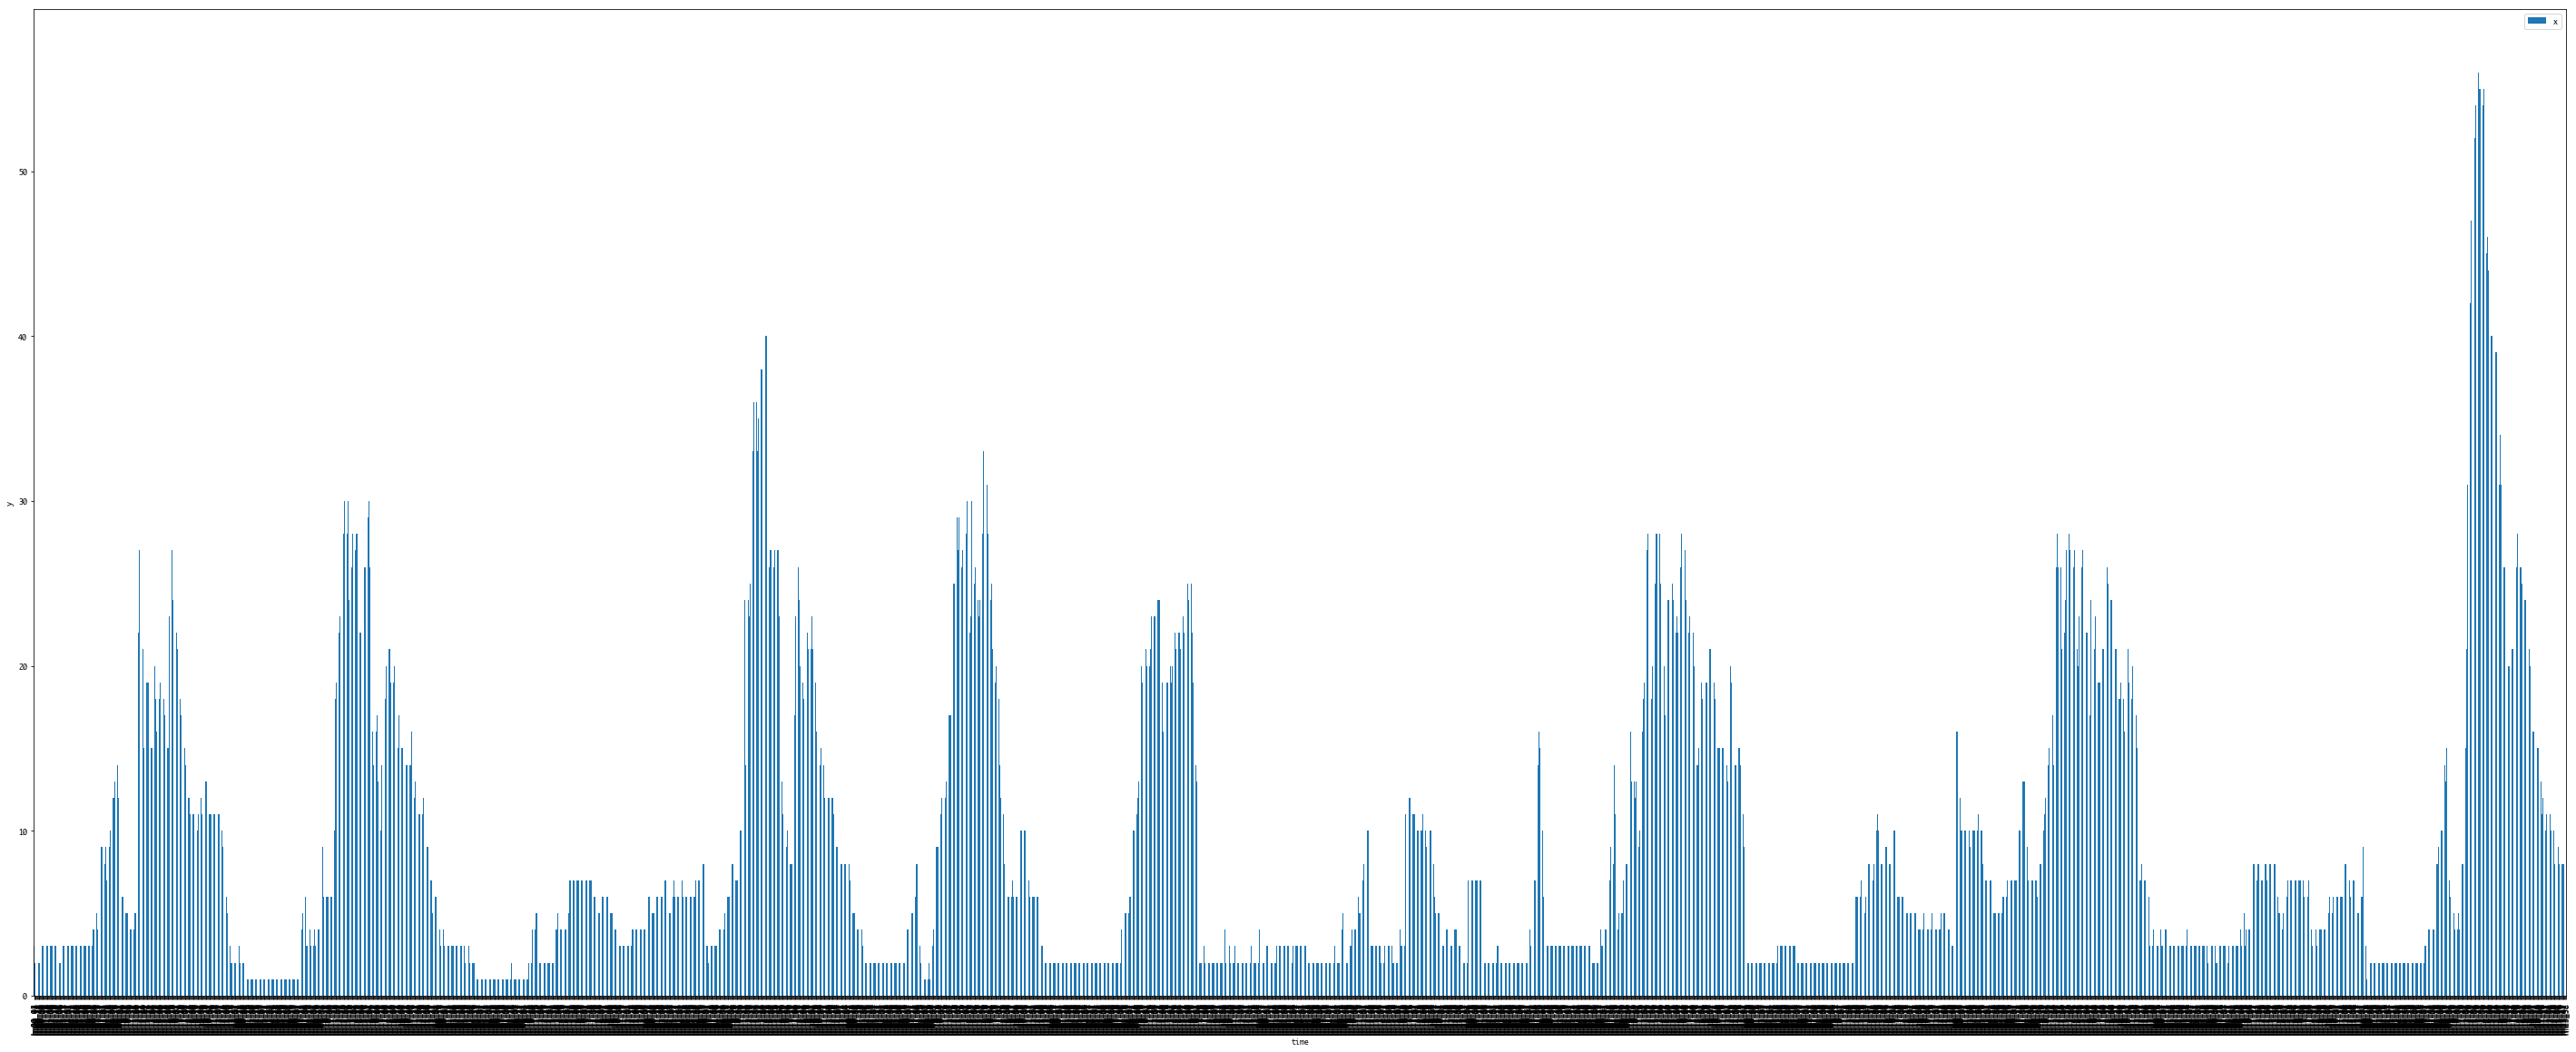

In [35]:
df=pd.DataFrame({"x":result,"time":table})
fig, ax = plt.subplots(figsize=(50, 20))
df.set_index("time").plot.bar(ax=ax)
# ax.set_xlabel('')  # x軸ラベルOFF
ax.set_ylabel('y')
ax.axhline(y=0, color='silver', linestyle='-', linewidth=1)  # 0に補助線

In [7]:
start = time()
r = [read_db(data,"f4") for data in db_list]
result=np.array([])
print('{}秒かかりました'.format(time() - start))

11.600946187973022秒かかりました


In [38]:
def pass_func(a):
    pass

In [37]:
pass_func()

In [39]:
start = time()
r = Parallel(n_jobs=-1)( [delayed(pass_func)(data) for data in range(100)])
print('{}秒かかりました'.format(time() - start))

0.1610429286956787秒かかりました


In [40]:
start = time()
r = Parallel(n_jobs=-1)( [delayed(pass_func)(data) for data in range(1000)])
print('{}秒かかりました'.format(time() - start))

0.7100949287414551秒かかりました


In [28]:
start = time()
r=[test_read_db(data,"f4") for data in db_list]
stop=time() - start
print('{}秒かかりました'.format(time() - start))

14.225767135620117秒かかりました


In [120]:
from time import time,sleep
start = time()
sleep(1)
stop=float(time() - start)
round(stop,-2)


0.0

In [128]:
len(db_list)

13

In [130]:
result_times=[]
for j in range(10):
    result_time=[]
    for i in range (1,21):
        start = time()
        r = Parallel(n_jobs=i)( [delayed(test_read_db)(data,"f4") for data in db_list])
        stop=float(time() - start)
        print('{}秒かかりました'.format(stop))
        result_time.append(stop)
    result_times.append(result_time)

8.990855932235718秒かかりました
6.552423000335693秒かかりました
5.017636775970459秒かかりました
4.905253171920776秒かかりました
4.611603021621704秒かかりました
4.541184902191162秒かかりました
4.443051099777222秒かかりました
4.424458026885986秒かかりました
4.482518911361694秒かかりました
4.476187229156494秒かかりました
4.577743053436279秒かかりました
4.526036024093628秒かかりました
4.574167251586914秒かかりました
4.351909160614014秒かかりました
4.449994087219238秒かかりました
4.443560838699341秒かかりました
4.451067924499512秒かかりました
4.691569089889526秒かかりました
4.323337078094482秒かかりました
4.456482887268066秒かかりました
8.904896020889282秒かかりました
6.740902900695801秒かかりました
5.011577129364014秒かかりました
4.746864080429077秒かかりました
4.493937969207764秒かかりました
4.5864410400390625秒かかりました
4.460547924041748秒かかりました
4.436535120010376秒かかりました
4.472034215927124秒かかりました
4.597829103469849秒かかりました
4.61133074760437秒かかりました
4.572810173034668秒かかりました
4.30049204826355秒かかりました
4.541982173919678秒かかりました
4.790501832962036秒かかりました
4.344119071960449秒かかりました
4.734243154525757秒かかりました
4.3015828132629395秒かかりました
4.727851152420044秒かかりました
4.866083145141602秒かかりました


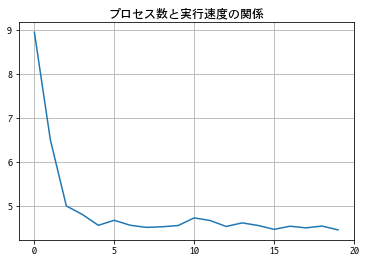

In [143]:
pd.DataFrame(result_times).mean().plot(title="プロセス数と実行速度の関係",grid=True,xticks=[0,5,10,15,20])

In [102]:
start = time()
r = Parallel(n_jobs=2)( [delayed(test_read_db)(data,"f4") for data in db_list])
print('{}秒かかりました'.format(time() - start))

6.511257886886597秒かかりました


In [101]:
start = time()
r = Parallel(n_jobs=-1)( [delayed(test_read_db)(data,"f4") for data in db_list])
print('{}秒かかりました'.format(time() - start))

4.738276958465576秒かかりました


In [98]:
start = time()
r = Parallel(n_jobs=4)( [delayed(test_read_db)(data,"f4") for data in db_list])
print('{}秒かかりました'.format(time() - start))

6.219305992126465秒かかりました


In [35]:
data_list = psql.read_sql("select name from sqlite_master where type='table';", con)["name"].values.tolist()

In [38]:
s="SELECT * FROM "+data_list[1]+";"
psql.read_sql(s, con).fillna(0)

,index,k??,e16,e17,e18,e19
0,cs5f-ap-02,0.0,0.0,1.0,0.0,0.0
1,cs5f-ap-03,0.0,0.0,1.0,0.0,0.0
2,f4-ap-02,0.0,0.0,0.0,2.0,0.0
3,f4-ap-03,1.0,0.0,0.0,0.0,0.0
4,f5-ap-02,1.0,1.0,0.0,0.0,0.0
5,f6-ap-01,1.0,0.0,0.0,0.0,0.0
6,f6-ap-02,3.0,0.0,0.0,0.0,0.0
7,f6-ap-04,0.0,1.0,0.0,0.0,0.0
8,f7-ap-01,1.0,1.0,0.0,0.0,0.0
9,f7-ap-02,2.0,0.0,0.0,0.0,0.0


In [33]:
start = time()
result=[]
for i in data_list[:10]:
    s="SELECT * FROM "+i+";"
    df_plot_raw=psql.read_sql(s, con).fillna(0)
    data2=df_plot_raw
    a=data2[data2["index"].str.startswith("f4")].drop("index",axis=1).sum().sum()
    result.append(a)
print('{}秒かかりました'.format(time() - start))

0.052477121353149414秒かかりました


In [28]:
def read_table(table):
    file_sqlite3 = "./cities.db"
    con = sqlite3.connect(file_sqlite3)
    cur = con.cursor()
    s="SELECT * FROM "+table+";"
    df_plot_raw=psql.read_sql(s, con).fillna(0)
    data2=df_plot_raw
    a=data2[data2["index"].str.startswith("f4")].drop("index",axis=1).sum().sum()
    return a

In [7]:
read_table(data_list[1],3)

(1, 3)

In [7]:
from time import time

In [32]:
start = time()

print('{}秒かかりました'.format(time() - start))

0.4257209300994873秒かかりました


In [19]:
r

[3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]

In [21]:
start = time()
r = [(read_table)(data,i) for i,data in enumerate(data_list)]
print('{}秒かかりました'.format(time() - start))

KeyboardInterrupt: 

In [9]:
start = time()
r = Parallel(n_jobs=1)( [delayed(read_table)(data,i) for i,data in enumerate(data_list)])
print('{}秒かかりました'.format(time() - start))

200.32658696174622秒かかりました


In [10]:
start = time()
r = Parallel(n_jobs=-1)( [delayed(read_table)(data,i) for i,data in enumerate(data_list)])
print('{}秒かかりました'.format(time() - start))

102.6147792339325秒かかりました


In [ ]:
# 画像の作成

In [1]:
r

NameError: name 'r' is not defined

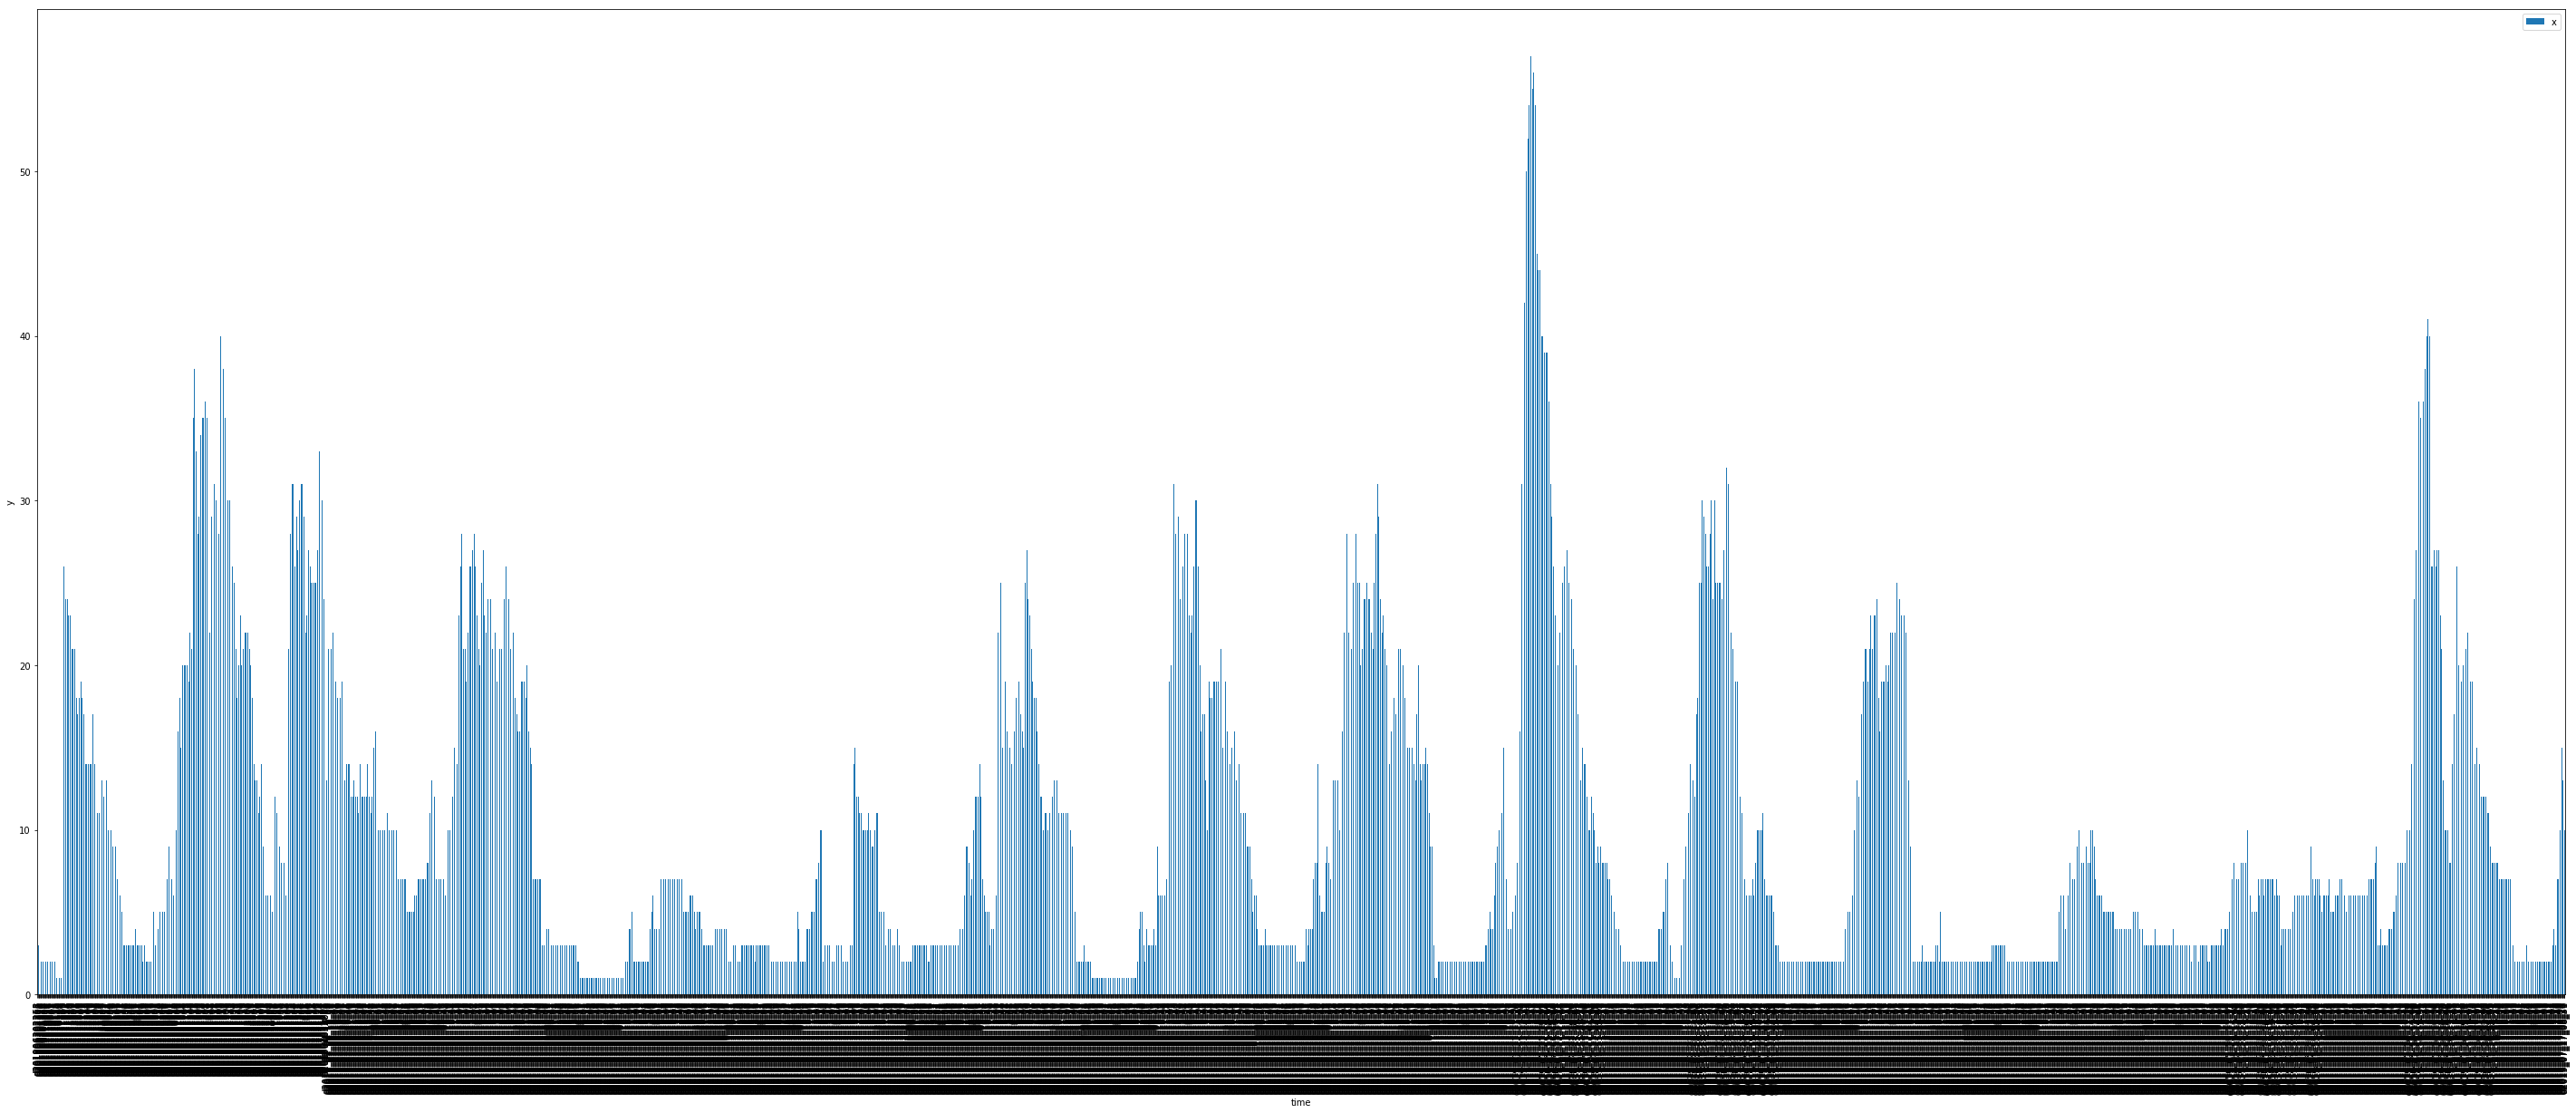

In [13]:
df=pd.DataFrame({"x":result,"time":data_list})

fig, ax = plt.subplots(figsize=(50, 20))

df.set_index("time").plot.bar(ax=ax)
# ax.set_xlabel('')  # x軸ラベルOFF
ax.set_ylabel('y')
ax.axhline(y=0, color='silver', linestyle='-', linewidth=1)  # 0に補助線
#plt.savefig("f4.png")

In [14]:
result=[]
class_id="f4"
result.append(data_list[data_list['index'].str.startswith(class_id)].drop("index",axis=1).sum().rename("f4").sum())


TypeError: list indices must be integers or slices, not str